# Predicting BigMart sales🏣

This notebook works on Bigmart dataset from kaggle. Here the task is to predict the sales of the BigMart i.e it's a regression problem. So let's get started

### 1. Problem:
It' a data of a superstore named BigMart and we have to predict sales of the store.
### 2.  Data:
This dataset contains 8523 observations and 12 features.
* Item_Identifier - Unique product ID
* Item_Weight -  weight of the product
* Item_Fat_Content: weather the product is low fat or not
* Item_Visibility : % of area allocated to display the product
* Item_Type: Category to which the product belong
* Item_MRP : max retail price of product
* Outlet_Identifier: Unique store ID
* Outlet_Establishmet_Year : year in which the store was established
* Outlet_size: size of the store
* Outlet_Location_Type : type of city in which the store is located
* Outlet_Type: Type of store i.e grocery store or supermarket etc
* Item_Outlet_Sale : Sales of the product in perticular store (Target variable) 

## 1. Preparing tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

**Our goal is to identify important variables and then defining the model to find predictions.**


## 2. Exploratory data analysis (EDA):
We have to first know the insights of the data. We can explore data by knowing the attributes and finding corelations between attributes and also the target variable

**2.1 distribution of target variable**

First analysing our target variable

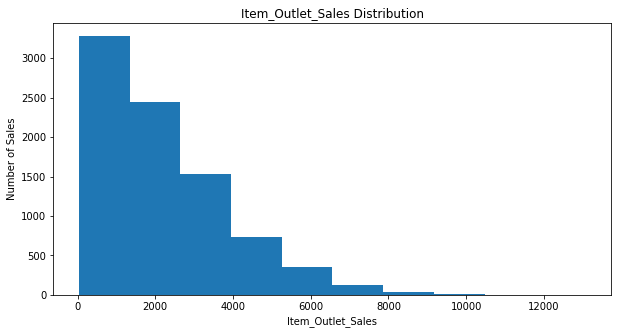

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(train.Item_Outlet_Sales)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution");

**2.2 Let's see which atrributes are numeric and them find correlation between them and the target variable**

In [6]:
# check which columns are numeric 
numeric_data = train.select_dtypes(include= [np.number])
numeric_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [7]:
# Correlation of numeric attributes with target variable

Text(0.5, 1.0, 'Item_Weight vs Item_Outlet_Sales')

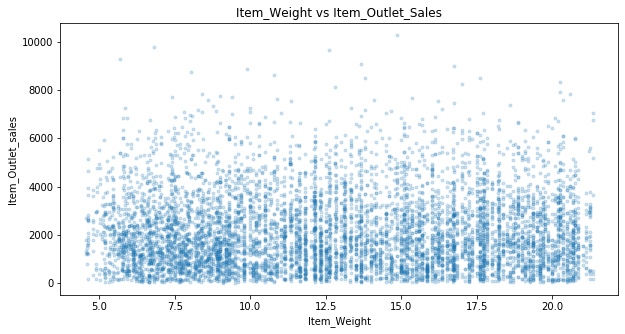

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(train['Item_Weight'], train['Item_Outlet_Sales'], '.', alpha=0.2 )
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_Weight vs Item_Outlet_Sales')

Text(0.5, 1.0, 'Item_Visibility vs Item_Outlet_Sales')

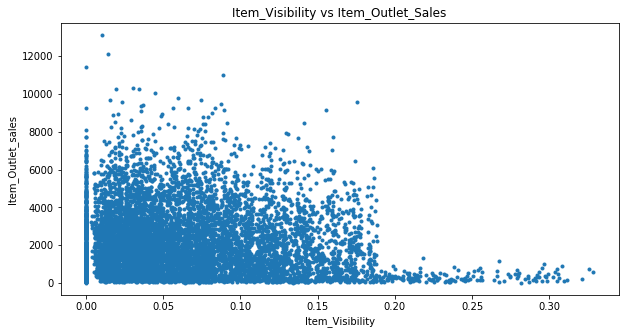

In [9]:
plt.figure(figsize=(10,5))
plt.plot(train.Item_Visibility, train.Item_Outlet_Sales, '.')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_Visibility vs Item_Outlet_Sales')

<BarContainer object of 8523 artists>

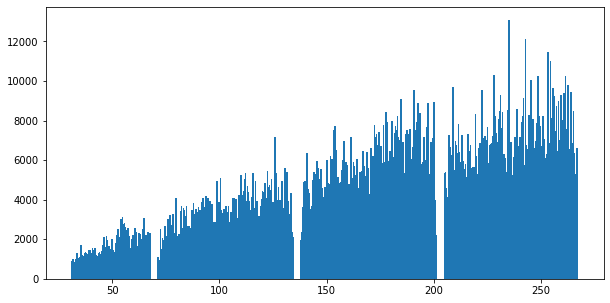

In [10]:
plt.figure(figsize=(10,5))
plt.bar(train.Item_MRP, train.Item_Outlet_Sales)

**2.3 Let's see the attributes that are categorial and find correlations**

In [11]:
# See Data that's categorial
categorial_data = train.drop(numeric_data, axis =1)
categorial_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


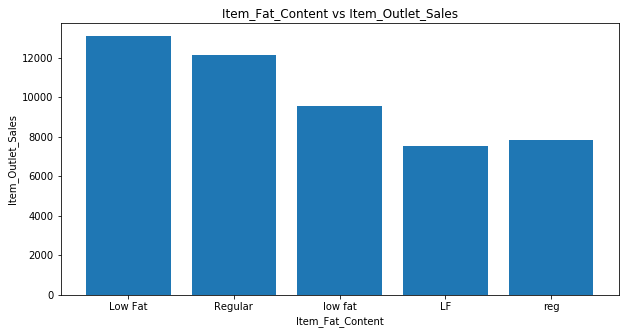

In [12]:
## Impact of Item_Fat_Content on Item_Outlet_Sales
plt.figure(figsize=(10, 5))
plt.bar(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content vs Item_Outlet_Sales');

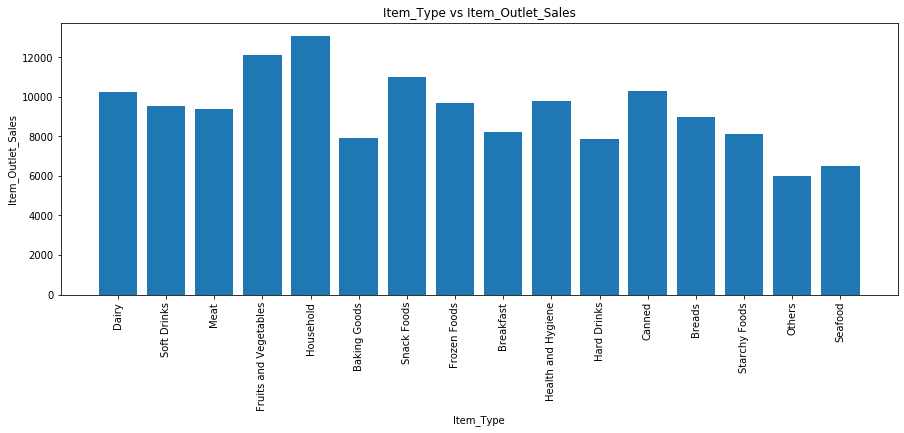

In [13]:
## Let's see a plot of item type vs it's sales.It's an important variable as we would know which type of item is sold most
plt.figure(figsize=(15,5))
plt.bar(train.Item_Type, train.Item_Outlet_Sales)
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Type vs Item_Outlet_Sales')
plt.xticks(rotation = 90);

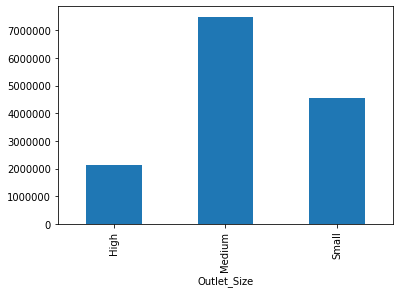

In [14]:
# Let's see what is the impact of size of store on the sale
train.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot.bar()

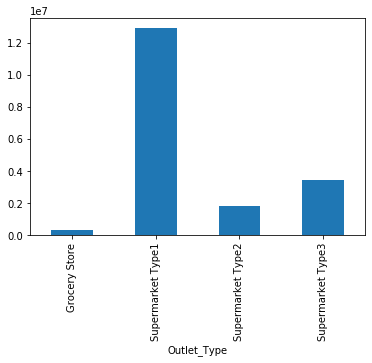

In [15]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot.bar()

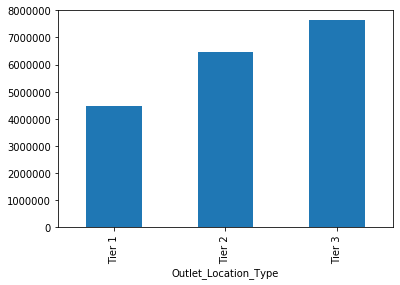

In [16]:
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().plot.bar()

### Let's see what we analysed so far:
* Important labels :

    1. Item_Visibility : least visible items are sold most (unexpected)
    2. Item_Type : Houshold products are sold most
    3. Item_MRP 
    4. Outlet_size : Mediam size stores have highest sale
    5. Outlet_Loaction_Type : stores in Tier 3 have highest sales
    6. Outlet_type :supermarket 1 has highest sale

## 3. Data Preprocessing

Firstly we will create aa copy of train and test dataset so that the changes we make in new dataset doen't change the old data

secoundly we will create a function that will remove all null values and also convert object datatype into categorical data

In [17]:
train_temp = train.copy()
train_temp = pd.DataFrame(train_temp)
test_temp = test.copy()
test_temp = pd.DataFrame(test_temp)
train_temp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
# filling missing data
def preprocessing(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # add a binary column which tells us if the data was missing or not
                data[label + "_is_missing"] = pd.isnull(content)
                # fill missing numeric values with median
                data[label] = content.fillna(content.median())
                # turn categorial variables into numbers and fill missing
        else:
            # add binary column to indicate weather sample have missing value
            data[label + '_is_missing'] = pd.isnull(content)
            # turn categories into numbers where missing values will be 0
            data[label] = pd.Categorical(content).codes +1

In [19]:
preprocessing(train_temp)

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
train_temp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_is_missing,Item_Weight_is_missing,Item_Fat_Content_is_missing,Item_Type_is_missing,Outlet_Identifier_is_missing,Outlet_Size_is_missing,Outlet_Location_Type_is_missing,Outlet_Type_is_missing
0,157,9.30,2,0.016047,5,249.8092,10,1999,2,1,2,3735.1380,False,False,False,False,False,False,False,False
1,9,5.92,3,0.019278,15,48.2692,4,2009,2,3,3,443.4228,False,False,False,False,False,False,False,False
2,663,17.50,2,0.016760,11,141.6180,10,1999,2,1,2,2097.2700,False,False,False,False,False,False,False,False
3,1122,19.20,3,0.000000,7,182.0950,1,1998,0,3,1,732.3800,False,False,False,False,False,True,False,False
4,1298,8.93,2,0.000000,10,53.8614,2,1987,1,3,2,994.7052,False,False,False,False,False,False,False,False


In [22]:
preprocessing(test_temp)

In [23]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [24]:
test_temp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_is_missing,Item_Weight_is_missing,Item_Fat_Content_is_missing,Item_Type_is_missing,Outlet_Identifier_is_missing,Outlet_Size_is_missing,Outlet_Location_Type_is_missing,Outlet_Type_is_missing
0,1104,20.750,2,0.007565,14,107.8622,10,1999,2,1,2,False,False,False,False,False,False,False,False
1,1068,8.300,5,0.038428,5,87.3198,3,2007,0,2,2,False,False,False,False,False,True,False,False
2,1407,14.600,2,0.099575,12,241.7538,1,1998,0,3,1,False,False,False,False,False,True,False,False
3,810,7.315,2,0.015388,14,155.0340,3,2007,0,2,2,False,False,False,False,False,True,False,False
4,1185,12.500,3,0.118599,5,234.2300,6,1985,2,3,4,False,True,False,False,False,False,False,False


So now our data have no null value and every column is numeric so we can further fit the model and score our model

## 4. Modelling

In [25]:
# Split data into x and y
x = train_temp.drop('Item_Outlet_Sales', axis =1 )
y =  train_temp['Item_Outlet_Sales']

x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_is_missing,Item_Weight_is_missing,Item_Fat_Content_is_missing,Item_Type_is_missing,Outlet_Identifier_is_missing,Outlet_Size_is_missing,Outlet_Location_Type_is_missing,Outlet_Type_is_missing
0,157,9.30,2,0.016047,5,249.8092,10,1999,2,1,2,False,False,False,False,False,False,False,False
1,9,5.92,3,0.019278,15,48.2692,4,2009,2,3,3,False,False,False,False,False,False,False,False
2,663,17.50,2,0.016760,11,141.6180,10,1999,2,1,2,False,False,False,False,False,False,False,False
3,1122,19.20,3,0.000000,7,182.0950,1,1998,0,3,1,False,False,False,False,False,True,False,False
4,1298,8.93,2,0.000000,10,53.8614,2,1987,1,3,2,False,False,False,False,False,False,False,False


In [26]:
# Split data into train and test
np.random.seed(42)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

### Let's first fit data to model

we will be using 2 models and then find the best model
1. Linear regression model
2. random forest regressor

In [27]:
m1 = LinearRegression()
m1.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
m2 = RandomForestRegressor(n_jobs =-1, random_state=42,verbose =2)
m2.fit(xtrain, ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.0s



building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 7

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=2, warm_start=False)

### Now let's build an evaluation metrics

we'll create a function to scofre our models

In [29]:
from sklearn.metrics import mean_absolute_error

def score_models(model):
    ypreds = model.predict(xtest)
    scores ={'accuracy': model.score(xtest, ytest),
             'MAE' : mean_absolute_error(ytest, ypreds)}
    return scores

In [30]:
score_models(m1)

{'accuracy': 0.5497917678687767, 'MAE': 829.853732911519}

In [31]:
score_models(m2)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


{'accuracy': 0.5620228612454123, 'MAE': 760.9939948328446}

## Hypertuning with RandomizedSearchCV

In [44]:
%%time 
from sklearn.model_selection import RandomizedSearchCV

# different randomforestregressor hyperperameters
rf_grid = {'n_estimators' : np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
            'max_features' : [0.5, 1, 'sqrt', 'auto']}

# instentiate randomizedsearchcv model
rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, 
                                                  random_state=42),
                                                  param_distributions = rf_grid,
                                                  n_iter = 2,
                                                  cv=5,
                                                  verbose=True)

rs_model.fit(xtrain, ytrain)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.0s finished


Wall time: 7.51 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [46]:
# evaluate model
score_models(rs_model)

{'accuracy': 0.6077556709182934, 'MAE': 732.4644023850948}

In [47]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_features': 'sqrt',
 'max_depth': None}

In [49]:
# Most Ideal Hyperperameters
ideal_model = RandomForestRegressor(n_estimators = 70,
 min_samples_split = 12,
 min_samples_leaf = 11,
 max_features = 'sqrt',
 max_depth = None)

# Fit ideal model
ideal_model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=11,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
score_models(ideal_model)

{'accuracy': 0.6084106477919455, 'MAE': 730.3423679924379}

## Make predictions on Test data

In [51]:
test_temp

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_is_missing,Item_Weight_is_missing,Item_Fat_Content_is_missing,Item_Type_is_missing,Outlet_Identifier_is_missing,Outlet_Size_is_missing,Outlet_Location_Type_is_missing,Outlet_Type_is_missing
0,1104,20.750,2,0.007565,14,107.8622,10,1999,2,1,2,False,False,False,False,False,False,False,False
1,1068,8.300,5,0.038428,5,87.3198,3,2007,0,2,2,False,False,False,False,False,True,False,False
2,1407,14.600,2,0.099575,12,241.7538,1,1998,0,3,1,False,False,False,False,False,True,False,False
3,810,7.315,2,0.015388,14,155.0340,3,2007,0,2,2,False,False,False,False,False,True,False,False
4,1185,12.500,3,0.118599,5,234.2300,6,1985,2,3,4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,232,10.500,3,0.013496,14,141.3154,9,1997,3,1,2,False,False,False,False,False,False,False,False
5677,307,7.600,3,0.142991,16,169.1448,4,2009,2,3,3,False,False,False,False,False,False,False,False
5678,1413,10.000,2,0.073529,9,118.7440,8,2002,0,2,2,False,False,False,False,False,True,False,False
5679,518,15.300,3,0.000000,4,214.6218,3,2007,0,2,2,False,False,False,False,False,True,False,False


In [66]:
test_preds = ideal_model.predict(test_temp)
test_preds

array([1721.66529791, 1464.11756856,  612.17975534, ..., 1985.49472396,
       3951.17718524, 1346.49849523])

In [68]:
Predicted_df = pd.DataFrame(index = [test.Item_Identifier, test_preds])
Predicted_df.head()

,
Item_Identifier,
FDW58,1721.665298
FDW14,1464.117569
NCN55,612.179755
FDQ58,2588.105395
FDY38,5548.558011
